***Preprocessing data***

In [ ]:
# Importing numpy library as nmp  
import numpy as np  
# Importing pandas library as pds  
import pandas as pd
# Importing matplotlib library as pplt  
import matplotlib.pyplot as pplt  
# Importing DBSCAN from cluster module of Sklearn library  
from sklearn.cluster import DBSCAN  
# Importing StandardSclaer and normalize from preprocessing module of Sklearn library  
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import normalize  
# Importing PCA from decomposition module of Sklearn  
from sklearn.decomposition import PCA  

In [ ]:

train = pd.read_csv('emails.csv')
train = np.array(train)
train = train[:,1:]
# Initializing a variable with the StandardSclaer() function  
scalerFD = StandardScaler()  
# Transforming the data of dataset with Scaler  
M_scaled = scalerFD.fit_transform(train)  
# To make sure that data will follow gaussian distribution  
# We will normalize the scaled data with normalize() function  
M_normalized = normalize(M_scaled)  



In [ ]:
# Initializing a variable with the PCA() function  
pcaFD = PCA(n_components = 2) # components of data  
# Transforming the normalized data with PCA  
M_principal = pcaFD.fit_transform(M_normalized)  
# Making dataframes from the transformed data  
M_principal = pd.DataFrame(M_principal)  
# Creating two columns in the transformed data  
M_principal.columns = ['C1', 'C2']  
# Printing the head of the transformed data  
print(M_principal.head())
data = np.array(M_principal)
print(data.shape)  

         C1        C2
0  0.360764 -0.100294
1 -0.308232  0.036797
2  0.380815 -0.129538
3 -0.197475  0.010698
4 -0.178701  0.026592
(5172, 2)


**DBSCAN from sklearn**

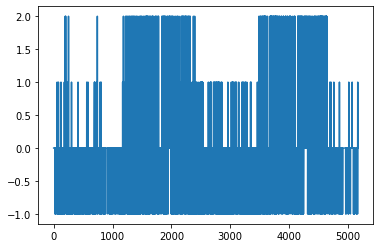

In [ ]:
import matplotlib.pyplot as plt

# Creating clustering model of the data using the DBSCAN function and providing parameters in it  
db_default = DBSCAN(eps = .0375, min_samples = 100).fit(data)  
# Labelling the clusters we have created in the dataset  
labeling = db_default.labels_  
plt.plot(labeling)

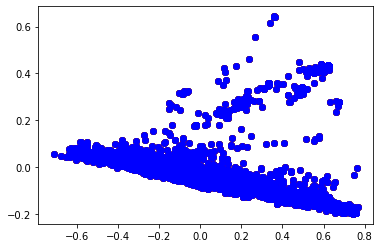

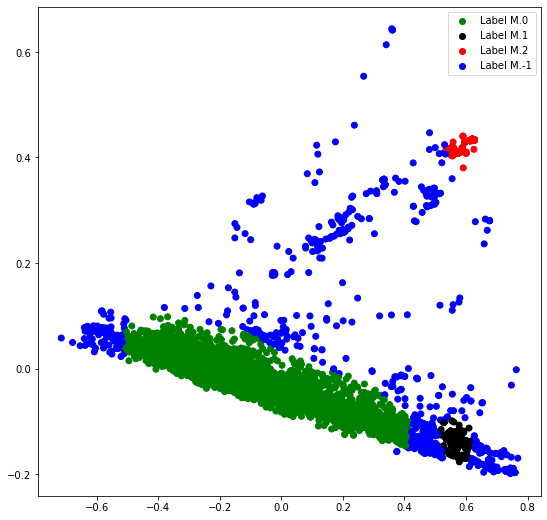

In [ ]:
# Visualization of clustering model by giving different colours  
colours = {}  
# First colour in visualization is green  
colours[0] = 'g'  
# Second colour in visualization is black  
colours[1] = 'k'  
# Third colour in visualization is red  
colours[2] = 'r'  
# Last colour in visualization is blue  
colours[-1] = 'b'  
# Creating a colour vector for each data point in the dataset cluster  
cvec = [colours[label] for label in labeling]  
# Construction of the legend  
# Scattering of green colour  
g = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='g');  
# Scattering of black colour  
k = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='k');  
# Scattering of red colour  
r = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='r');  
# Scattering of green colour  
b = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='b');   
# Plotting C1 column on the X-Axis and C2 on the Y-Axis  
# Fitting the size of the figure with figure function  
pplt.figure(figsize =(9, 9))  
# Scattering the data points in the Visualization graph  
pplt.scatter(M_principal['C1'], M_principal['C2'], c = cvec)  
# Building the legend with the coloured data points and labelled  
pplt.legend((g, k, r, b), ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1'))  
# Showing Visualization in the output  
pplt.show()  

DBSCAN from scratch 

In [ ]:
import numpy as np
from queue import Queue

In [ ]:
class mydbscan():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = np.array(df)
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fit the data"
        
        # Create labels column initialized to -1 (unclassified)
        self.df = np.append(self.df, np.array([[-1]*len(self.df)]).reshape(-1,1), axis=1)
        
        for x in range(len(self.df)):
            
            # if the point is not labled already then search for neighbors
            if self.df[x,2] != -1:
                continue
            
            # find neighbors
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            
            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
                
            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df[x,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            found_neighbors = neighbors
            
            # create Queue to fold all neighbors of cluster
            q = Queue()
            
            # add original neighbors
            for x in neighbors:
                q.put(x)
            
            # While isnt empty label new neighbors to cluster
            while q.empty() == False:
                
                current = q.get()
                
                # if cur_row labled noise then change to cluster label (border point)
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label

                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue
                    
                # label the neighbor
                self.df[current,2] = self.cluster_label

                # look for neightbors of cur_row
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def predict(self, x):
        "Return the predicted labels"
        
        preds = []
        
        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df[neighbors[0],2]
            preds.append(label)
        
        return preds
    
    def rangeQuery(self, x):
        """Query database against x and return all points that are <= epsilon"""
        
        neighbors = []
        
        for y in range(len(self.df)):
            q = self.df[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        """Euclid distance function"""
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

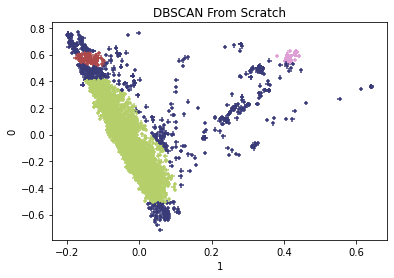

In [ ]:
test = mydbscan(data, 0.0375, 100)
test.fit()
pd.DataFrame(test.df).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN From Scratch", marker="+", colormap="tab20b");